In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r'C:\Users\ACER\Adidas_US_Sales_Datasets.xlsx')
print(df.head())

      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-01-02  Northeast  New York  New York   
2  Foot Locker      1185732   2020-01-03  Northeast  New York  New York   
3  Foot Locker      1185732   2020-01-04  Northeast  New York  New York   
4  Foot Locker      1185732   2020-01-05  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200     600000.0   
1    Men's Athletic Footwear            50.0        1000     500000.0   
2    Women's Street Footwear            40.0        1000     400000.0   
3  Women's Athletic Footwear            45.0         850     382500.0   
4              Men's Apparel            60.0         900     540000.0   

   Operating Profit  Operating Margin Sales Method  
0          300000.0              0.50     In-store  
1   

In [114]:
# print(df.columns
# df.columns = ['Retailer', 'Retailer ID','Invoice Date','Region','State','City','Product','Price per Unit','Units Sold','Total Sales','Operating Profit','Operating Margin','Sales Method']  # Sütun adlarını yeniden adlandır

In [3]:
# sütun isimlerini düzeltme
df.columns = df.columns.str.strip()
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [4]:
# her sütundaki eşsiz değerlerin hesaplanması 
unique_values = df.nunique()
print(unique_values)

Retailer               6
Retailer ID            4
Invoice Date         724
Region                 5
State                 50
City                  52
Product                6
Price per Unit       146
Units Sold           361
Total Sales         3512
Operating Profit    6510
Operating Margin     127
Sales Method           3
dtype: int64


In [5]:
#Mağazaların toplam satışını hesaplama 
toplam_satis = df.groupby('Retailer')['Total Sales'].sum()
print(toplam_satis)

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: Total Sales, dtype: float64


<Axes: xlabel='Retailer'>

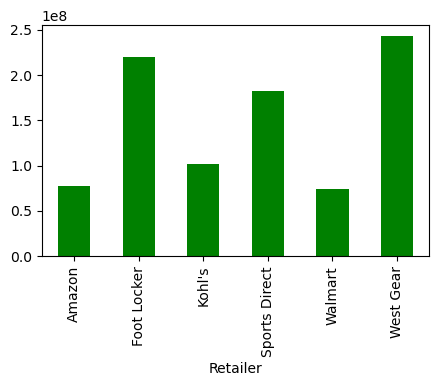

In [19]:
# görselleştirme kısmı 
plt.figure(figsize=(5, 3))
toplam_satis.plot(kind='bar', color='green')

In [34]:
#walmart_ny = df[(df['Retailer'] == 'Walmart') & (df['City'] == 'New York')]
#print(walmart_ny)
#grouped_data = walmart_ny.groupby('Retailer')['Total Sales'].sum().reset_index()
#print(grouped_data)

In [35]:
# Bölgelere göre toplam satışları hesaplama.
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()
print(region_sales)

      Region  Total Sales
0    Midwest  135800459.0
1  Northeast  186324067.0
2      South  144663181.0
3  Southeast  163171236.0
4       West  269943182.0


In [37]:
# Ürünlere göre ortalama karı hesaplama.
product_profit = df.groupby('Product')['Operating Profit'].mean().reset_index()
print(product_profit)

                     Product  Operating Profit
0              Men's Apparel      27872.372559
1    Men's Athletic Footwear      32203.036143
2      Men's Street Footwear      51429.975540
3            Women's Apparel      42693.389652
4  Women's Athletic Footwear      24268.857372
5    Women's Street Footwear      28044.668414


In [39]:
# Satış yöntemine göre toplam satışları hesaplama.
sales_method_sales = df.groupby('Sales Method')['Total Sales'].sum().reset_index()
print(sales_method_sales)

  Sales Method  Total Sales
0     In-store  356643750.0
1       Online  247672882.0
2       Outlet  295585493.0


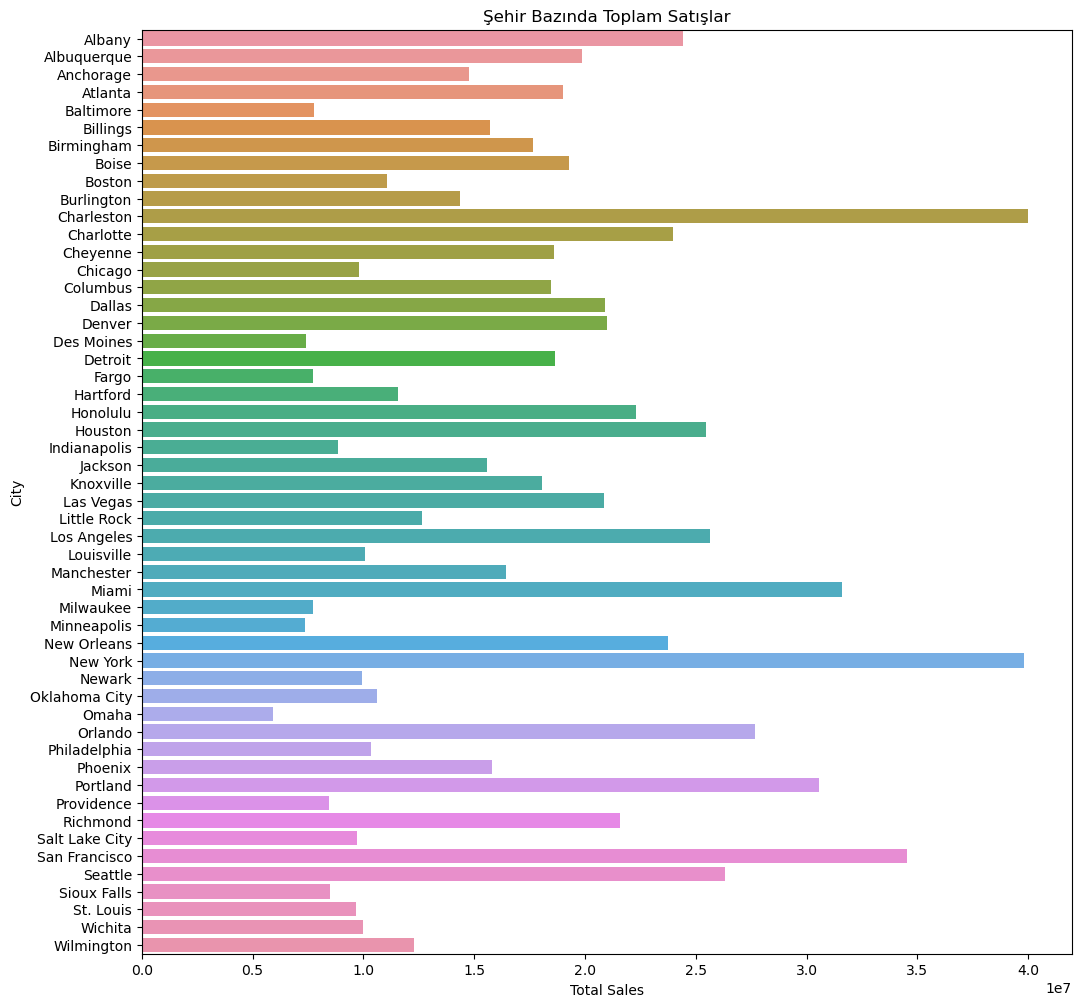

In [49]:
# Şehirlere göre toplam satışları hesaplama.
city_sales = df.groupby('City')['Total Sales'].sum().reset_index()
plt.figure(figsize=(12,12))
sns.barplot(x='Total Sales', y='City', data=city_sales)
plt.title('Şehir Bazında Toplam Satışlar')
plt.show()

In [50]:
# Fatura tarihine göre toplam satışları hesaplama
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
date_sales = df.groupby(df['Invoice Date'].dt.to_period('M'))['Total Sales'].sum().reset_index()
print(date_sales)

   Invoice Date  Total Sales
0       2020-01   16253746.0
1       2020-02   14997988.0
2       2020-03   17660577.0
3       2020-04   24607006.0
4       2020-05   16918014.0
5       2020-06    8829819.0
6       2020-07   17146013.0
7       2020-08   19877980.0
8       2020-09   18304436.0
9       2020-10   10836269.0
10      2020-11    8622300.0
11      2020-12    8026527.0
12      2021-01   55225396.0
13      2021-02   46102165.0
14      2021-03   39148532.0
15      2021-04   47732964.0
16      2021-05   63589681.0
17      2021-06   65917553.0
18      2021-07   78334681.0
19      2021-08   72288221.0
20      2021-09   59357023.0
21      2021-10   53074764.0
22      2021-11   59235040.0
23      2021-12   77815430.0


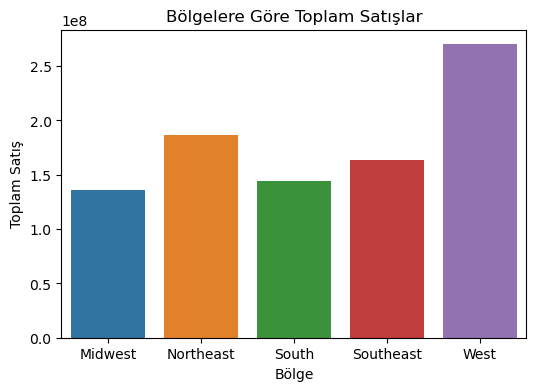

In [54]:
# Bölgelere göre toplam satışları hesaplama.
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='Total Sales', data=region_sales)
plt.title('Bölgelere Göre Toplam Satışlar')
plt.xlabel('Bölge')
plt.ylabel('Toplam Satış')
plt.show()

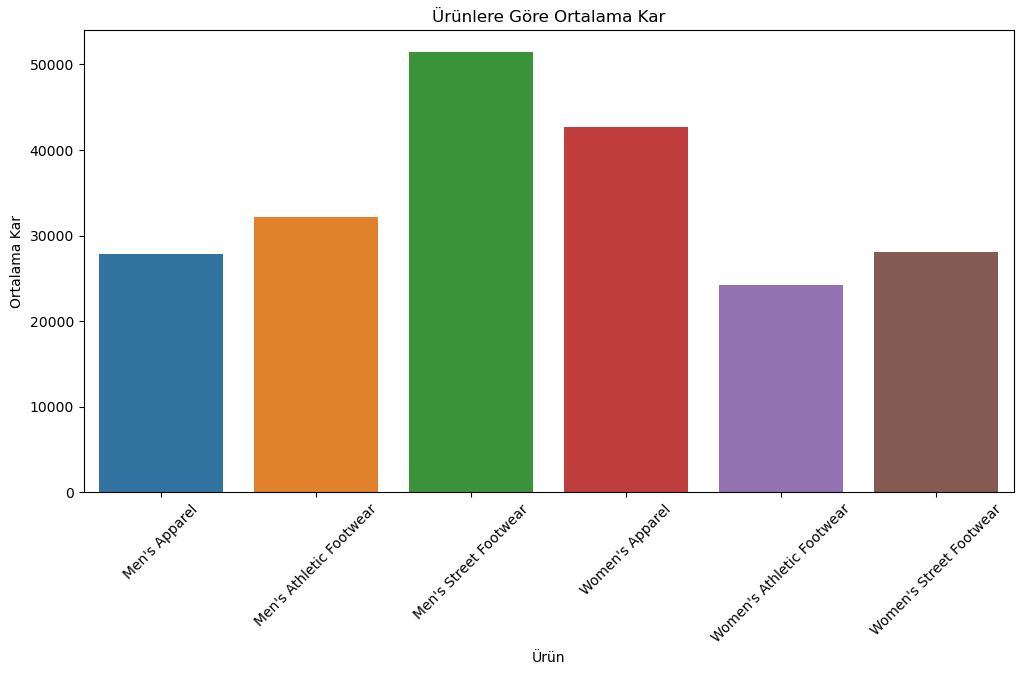

In [58]:
# Ürünlere göre ortalama karı hesaplama.
product_profit = df.groupby('Product')['Operating Profit'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='Product', y='Operating Profit', data=product_profit)
plt.title('Ürünlere Göre Ortalama Kar')
plt.xlabel('Ürün')
plt.ylabel('Ortalama Kar')
plt.xticks(rotation=45)
plt.show()